<a href="https://colab.research.google.com/github/johnryantaylor/QCES/blob/main/python_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Python for QCES

This notebook provides an introduction to Python and covers the concepts and commands that we will use during the LNM computational practicals in Quantitative Climate and Environmental Science.

The notebook is organized into the following sections
1. [Python basics](#section1) (variables, operations, functions)
2. [Working with NumPy arrays](#section2)
3. [Plotting with Matplotlib](#section3)
4. [Pracice exercises](#section4)
5. [Summary and other resources](#section5)


## 1. Python Basics

### 1.1 Variables and Data Types

In Python, you can store values in variables. Python automatically determines the type of data you're working with.


In [ ]:
# This is a comment - Python ignores everything after the # symbol

# Numbers (integers and floats)
x = 5          # integer
y = 3.14       # float (decimal number)
z = 2.0        # also a float, even though it looks like a whole number

# Strings (text)
name = "Python"
greeting = 'Hello, World!'  # Single or double quotes both produce strings

# Print values to see them
print(x)
print(y)
print(greeting)

### 1.2 Mathematical Operations

Python supports standard mathematical operations.  Some examples are below.


In [ ]:
# Basic arithmetic
a = 10
b = 3

print("Addition:", a + b)        # 13
print("Subtraction:", a - b)     # 7
print("Multiplication:", a * b)  # 30
print("Division:", a / b)        # Note that this produces a float = 3.333...
print("Exponentiation:", a ** b) # 1000 (10 to the power of 3)

# Order of operations follows standard mathematical rules (PEMDAS)
result = (a + b) * 2 ** 3
print("Complex expression:", result)


### 1.3 Lists

Lists store multiple values in a single variable. The first value is indexed at 0, the second value is indexed at 1, and so on.  Negative indices can be used to count backwards from the end. For example, the -1 index corresponds to the last element in the list, -2 is the second to last element, etc.

Elements can be added to a list using `append`.

The length of the list can be determined using `len`.

In [ ]:
# Create a list
temperatures = [15.5, 18.2, 22.1, 19.8, 16.3]

# Access elements by index (starting at 0)
print("First temperature:", temperatures[0])
# Access the last element in the list
print("Last temperature:", temperatures[-1])

# Add elements to a list
temperatures.append(20.5)
print("Updated list:", temperatures)

# Get the length of a list
print("Number of measurements:", len(temperatures))


### 1.4 Loops

Loops let you repeat operations. The syntax is

`for variable in sequence:`

followed by a tab-indented block of code which will be repeated by the for loop with `variable` taking the values specified in `sequence`. Unlike MATLAB, there is no `end` command. The for loop will end when the indentation ends.

The command `range` generates a list with a sequence of integers and is particularly helpful for creating loops.

`range(start,stop)` creates a list of integers from `start` to `stop-1`.

`range(start,stop,step)` creates a list of integers from `start` to `stop-1`, counting by `step`.


In [ ]:
# Loop through a range of numbers
for i in range(5):  # range(5) creates a list consisting of elements 0, 1, 2, 3, 4
    print("Iteration", i)

# You can also loop through specific values
for value in [10, 20, 30]:
    print("Value:", value)

### 1.5 Conditionals

Use `if` statements to test conditions. The syntax is

`if test_condition:`

followed by an indented block of code that will be executed if the condition is met. Note that unlike MATLAB and other languages, no end statement follows. The if block will be broken when the indentation is reset.

Optionally, an `if` statement can be followed by `else:` which will execute the subsequent indented code if the condition is not met.

Nested conditionals can be created using `elif condition:` which will only execute if the prior condition(s) is not met and the second condition is met.

Variables can be given boolean (true/false type) using `True` and `False`.



In [ ]:
Flag = True
if Flag:
    print("The flag is set to True!")
else:
    print("The flag is set to False.")

temperature = 25  # degrees Celsius

if temperature > 30:
    print("It's hot!")
elif temperature > 20:
    print("It's warm.")
elif temperature > 10:
    print("It's cool.")
elif temperature > 0:
    print("It's chilly.")
else:
    print("It's freezing!")


### 1.6 Functions

Functions let you package code for reuse.  In the cell below we also make use of f-string (formatted string literal) which is a way to embed expressions inside strings.


In [ ]:
# Define a function
def celsius_to_fahrenheit(celsius):
    fahrenheit = celsius * 9/5 + 32
    return fahrenheit

# Use the function
temp_c = 25
temp_f = celsius_to_fahrenheit(temp_c)
print(f"{temp_c}°C is {temp_f}°F")  # f-string for formatted output


## 2. NumPy: Numerical Python

NumPy is the fundamental package for scientific computing in Python. It provides powerful array objects and mathematical functions.

### 2.1 Importing NumPy

First, we need to import the NumPy library. By convention, we give it the alias `np`:

In [2]:
import numpy as np


### 2.2 Creating Arrays

NumPy arrays are like lists, but are much more powerful for numerical operations. Unlike lists, all elements in NumPy arrays must be of the same type. If


In [ ]:
# Create an array from a list
arr1 = np.array([1, 2, 3, 4, 5])
print("Array:", arr1)

arr_mixed = np.array([1, 2, 4.0, 'why?'])  # Turning Mixed type lists into NumPy arrays results in all elements being converted to the same type
print("Array with mixed types:", arr_mixed)

# Create an array of zeros
zeros = np.zeros(5)
print("Zeros:", zeros)

# Create an array of ones
ones = np.ones(4)
print("Ones:", ones)

# Create evenly spaced values
x = np.linspace(0, 10, 6)  # 6 values from 0 to 10
print("Linspace:", x)


### 2.3 Array Operations

One of NumPy's most powerful features is **vectorization** - which applies operations to entire arrays at once. This is much faster than doing operations pointwise.


In [ ]:
# Create two arrays
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

# Element-wise operations
print("Addition:", a + b)          # [11, 22, 33, 44]
print("Multiplication:", a * b)    # [10, 40, 90, 160]
print("Exponentiation:", a ** 2)   # [1, 4, 9, 16]

# Operations with scalars
print("Add 5 to all:", a + 5)      # [6, 7, 8, 9]
print("Multiply by 10:", a * 10)   # [10, 20, 30, 40]


We can test this assertion by timing operations with a python list and a NumPy array using the `time` function.

In [ ]:
import time # Use the time module to time multiplication of lists and NumPy arrays

# Create large arrays/lists
size = 10**6
list_a = list(range(size))
list_b = list(range(size))

array_a = np.array(list_a)
array_b = np.array(list_b)

# Multiply lists
start_time = time.time()
list_result = [0]*size
for i in range(size):
    list_result[i] = list_a[i] * list_b[i]
print("List multiplication time in seconds:", time.time() - start_time)

# Multiply NumPy arrays
start_time = time.time()
array_result = array_a * array_b
print("NumPy multiplication time in seconds:", time.time() - start_time)

### 2.4 Mathematical Functions

NumPy provides many mathematical functions that work on arrays. A few examples are below.

In [ ]:
# Create an array of angles
angles = np.linspace(0, 2*np.pi, 5)

# Trigonometric functions
print("Sine:", np.sin(angles))
print("Cosine:", np.cos(angles))

# Exponential and logarithmic
x = np.array([1, 2, 3])
print("Exponential:", np.exp(x))   # e^x

# Other useful functions
data = np.array([1, 4, 2, 8, 3])
print("Maximum:", np.max(data))
print("Mean:", np.mean(data))
print("Square root:", np.sqrt(data))


### 2.5 Array Indexing and Slicing

We can access elements of NumPy arrays in a similar way to lists. As with lists, the first element of a NumPy array is indexed to 0, then 1, etc.

We can access multiple elements using array slicing with the syntax `arr[start:end]` where `arr` is a NumPy array and `start` and `end-1` are the starting and ending indices of the slice. It is important to note that the end index is not included in the slice when doing `arr[start:end]`.

If we omit start and/or end, then we index to the end of the array.


In [ ]:
# Create an array
arr = np.array([10, 20, 30, 40, 50, 60])

# Access single elements
print("First element:", arr[0])
print("Last element:", arr[-1])

print("All: ", arr[:])
print("First three:", arr[0:3])    # [10, 20, 30]
print("First three (again):", arr[:3]) # [10, 20, 30]
print("From index 2 on:", arr[2:]) # [30, 40, 50, 60]
print("Every other:", arr[::2])    # [10, 30, 50]


### 2.6 Multidimensional arrays

NumPy can work with multi-dimensional arrays. For example, a two-dimensional array can be used to store the coefficients of a matrix. Remember that indexing starts at 0 (which is different from what might be used to when thinking about matrices).

Attributes of NumPy arrays can be accessed using a dot following the array name, followed by the attribute. We can get the size of each dimension of an array using the `shape` attribute.


In [ ]:
# Create a 2D array (matrix)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
print("Matrix:")
print(matrix)

# Access elements: array[row, column]
print("Element at row 1, col 2:", matrix[1, 2])  # 6

# Print the size of each dimension of the array
print("Shape:", matrix.shape)  # (3, 3)

# Create a 2D array of zeros
zero_array = np.zeros((3, 4))  # 3 rows, 4 columns
print("Zero array:")
print(zero_array)


## 3. Matplotlib: Plotting and Visualization

Matplotlib is a standard Python plotting library which we will use in the LNM computational projects. We will use the `pyplot` interface which operates in a similar way to plots in MATLAB.

### 3.1 Importing Matplotlib


In [3]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and alias it to plt

### 3.2 Basic Line Plot


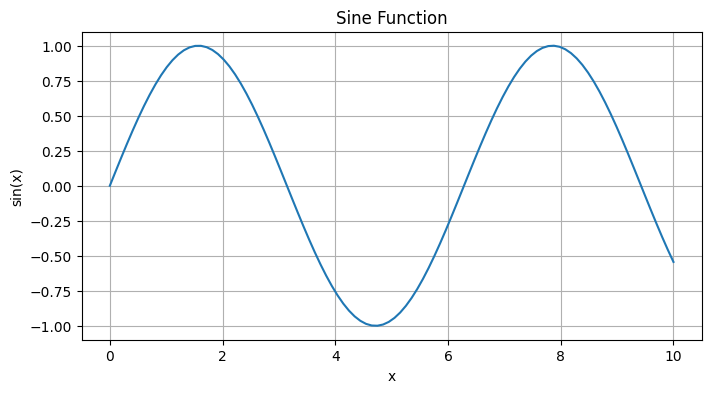

In [6]:
# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
plt.figure(figsize=(8, 4))  # Set figure size (width, height in inches)
plt.plot(x, y)
plt.xlabel('x')             # Label x-axis
plt.ylabel('sin(x)')        # Label y-axis
plt.title('Sine Function') # Add title
plt.grid(True)              # Add grid
plt.show()                  # Display the plot


### 3.3 Overlaying plots

We can overlay plots with multiple calls to the `plt.plot` function

In [ ]:
# Plot multiple lines
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y1, 'b-', label='sin(x)', linewidth=2)   # blue solid line
plt.plot(x, y2, 'r--', label='cos(x)', linewidth=2)  # red dashed line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trigonometric Functions')
plt.legend()  # Show legend
plt.xlim(0, 2*np.pi)  # Set x-axis limits
plt.ylim(-1.5, 1.5)   # Set y-axis limits
plt.grid(True, alpha=0.3)  # Semi-transparent grid
plt.show()


### 3.4 Scatter Plots

Scatter plots can be used to plot individual data points.

In [ ]:
# Create some scattered data
x = np.random.rand(50)  # 50 random values between 0 and 1
y = 2*x + 0.5 + 0.2*np.random.randn(50)  # Linear relationship with noise

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=50, alpha=0.6)  # s=size, alpha=transparency
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot Example')
plt.grid(True)
plt.show()


### 3.5 Heatmaps and contour plots

When plotting 2D data, say a function of $x$ and $y$, we need to generate a 2D 'grid' of x and y values to pass to the plotting functions. We can do this by first creating 1D arrays with a set of points in x and y and the using the `np.meshgrid` function to turn these into 2D coordinate grids for plotting.

The plotting function `pcolormesh` creates colored grid (heatmap) plots. `contour` creates a 2D contour plot. Here, we overlay a contour on top of a heatmap.

Using the command `plt.axis('equal')` we ensure that the plot maintains an equal aspect ratio in x and y so that the contours appear circular.

Note that we can put equations inside dollar signs for mathematical formatting (in this case showing $x^2$ and $y^2$ in the plot title).


In [ ]:
# Create a 2D function to visualize
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)  # Create 2D coordinate arrays
Z = np.exp(-(X**2 + Y**2))  # 2D Gaussian

plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z, cmap='viridis', shading='auto')  # cmap sets color scheme
plt.colorbar(label='z(x,y)')  # Add colorbar with label
plt.contour(X, Y, Z, levels=10, colors='black', linestyles='dashed')  # Overlay dashed contour lines
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Gaussian Function, z(x,y) = exp(-($x^2$ + $y^2$))')
plt.axis('equal')  # Equal aspect ratio
plt.show()

### 3.6 Subplots

We can create multiple plots in one figure using the `subplot` command. When called with `subplot(r,c,i)`, this will generate a figure with `r` total rows, `c` total columns, and we 'activate' subplot number `i` so that subsequent plotting commands will operate on that subplot. The subplots are numbered from left to right and from top to bottom (like reading a book).


In [ ]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(12, 4))

# First subplot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(x, np.sin(x))
plt.title('sin(x)')
plt.xlabel('x')
plt.ylabel('y')

# Second subplot
plt.subplot(1, 3, 2)
plt.plot(x, np.cos(x), 'r')
plt.title('cos(x)')
plt.xlabel('x')
plt.ylabel('y')

# Third subplot
plt.subplot(1, 3, 3)
plt.plot(x, np.exp(-x/5), 'g')
plt.title('exp(-x/5)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


## 4. Practice Exercises

Some optional excercises to practice your python skills

### 1. Unit Conversion
Create a one-dimensional NumPy array with values of temperatures in Celsius. Convert the temperatures to Fahrenheit and plot both on the same graph.


[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

Text(0, 0.5, '°F')

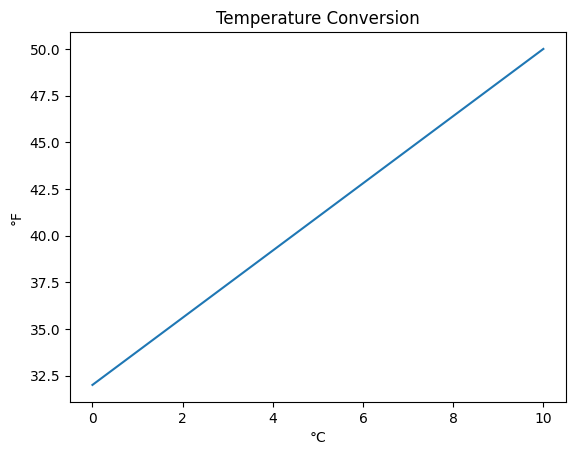

In [7]:
x = np.linspace(0, 10, 100)
print(x)
plt.plot(x, x*9/5 +32)
plt.title('Temperature Conversion')
plt.xlabel('°C')
plt.ylabel('°F')

### 2. Wave Superposition
Create a function of x which returns the sum of two sine waves with different frequencies. For example, let $f(x)=sin(x) + sin(3x)$. Then, create a NumPy array with a set of values of `x` and plot `f(x)` vs. `x`.


Text(0, 0.5, 'f(x)')

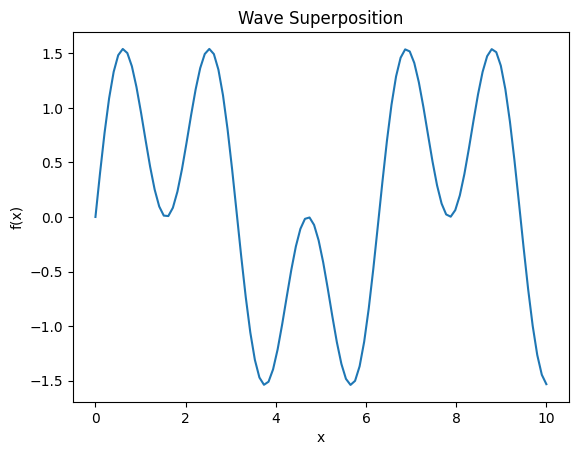

In [12]:
# Your code here
def f(x):
  return np.sin(x) + np.sin(3*x)

x = np.linspace(0, 10, 100)
plt.plot(x, f(x))
plt.title('Wave Superposition')
plt.xlabel('x')
plt.ylabel('f(x)')

### 3. 2D Pattern
Create and visualize a 2D function. Specifically, let $z(x,y)=sin(x)*cos(y)$. Make a contour plot of $z$ as a function of x and y, where x and y range from -π to π. Make sure that the plot has an equal aspect ratio so that the contours near the maximum and minimum points are circular.


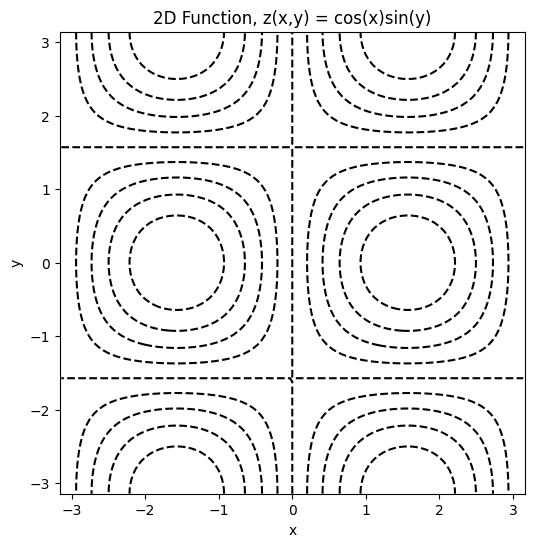

In [25]:
# Your code here
def z(x, y):
  return np.sin(x)*np.cos(y)

x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, y)  # Create 2D coordinate arrays
plt.figure(figsize=(6,6))
plt.contour(X, Y, z(X,Y), levels=10, colors='black', linestyles='dashed')  # Overlay dashed contour lines
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Function, z(x,y) = cos(x)sin(y)')
plt.axis('equal')  # Equal aspect ratio
plt.show()


## 5. Summary

**Python Basics:**
- Variables store data (no need to declare type)
- Lists can be used to store multiple values in a single variable
- The elements in a list can have multiple data types (e.g integer, float, string)
- Use `for` loops to repeat operations
- Use functions to organize reusable code
- Comments (using `#`) are helpful to explain your code

**NumPy:**
- `import numpy as np` to use NumPy
- Create arrays with `np.array()`, `np.zeros()`, `np.linspace()`
- Operations work element-wise on entire arrays
- Use mathematical functions: `np.sin()`, `np.exp()`, `np.sqrt()`, etc.
- Access elements with indexing: `arr[i]` or slicing: `arr[start:end-1]`

**Matplotlib:**
- `import matplotlib.pyplot as plt` to use Matplotlib
- `plt.plot(x, y)` for a line plot
- `plt.scatter(x, y)` for a scatter plot
- `plt.pcolormesh(X, Y, Z)` for a 2D heatmap
- `plt.contour(X, Y, Z)` for a 2D contour plot
- Always label axes and add titles for clarity
- Use `plt.show()` to display plots

**Useful Resources**

- **NumPy Documentation:** https://numpy.org/doc/
- **Matplotlib Gallery:** https://matplotlib.org/stable/gallery/
- **Python Tutorial:** https://docs.python.org/3/tutorial/
